In [1]:
import pickle
import numpy as np
import pandas as pd
import json

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from tensorflow.keras.metrics import Precision, Recall
import tensorflow.keras.backend as K
import seaborn as sns


import matplotlib.pyplot as plt

2023-06-25 03:55:16.581949: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-25 03:55:17.272824: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# Load input data

In [2]:
with open("data/X_train.pickle", "rb") as X_train_file, open(
    "data/X_test.pickle", "rb"
) as X_test_file, open("data/Y_train.pickle", "rb") as Y_train_file, open(
    "data/Y_test.pickle", "rb"
) as Y_test_file, open(
    "data/vocabulary.json", "rt"
) as vocabulary_file:
    X_test = pickle.load(X_test_file)
    X_train = pickle.load(X_train_file)
    Y_train = pickle.load(Y_train_file)
    Y_test = pickle.load(Y_test_file)
    vocabulary = json.load(vocabulary_file)

In [3]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

print(f"Y_train shape: {Y_train.shape}")
print(f"Y_test shape: {Y_test.shape}")

X_train shape: (32897, 5000)
X_test shape: (8225, 5000)
Y_train shape: (32897, 3)
Y_test shape: (8225, 3)


In [4]:
MAX_WORDS = X_train.shape[1]
NUM_OF_CLASSES = Y_train.shape[1]
EPOCH = 10

In [5]:
model = Sequential()
model.add(Dense(512, input_shape=(MAX_WORDS,)))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(NUM_OF_CLASSES))
model.add(Activation("softmax"))

2023-06-25 03:55:19.074645: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-25 03:55:19.141419: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-25 03:55:19.141500: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-25 03:55:19.144007: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-25 03:55:19.144091: I tensorflow/compile

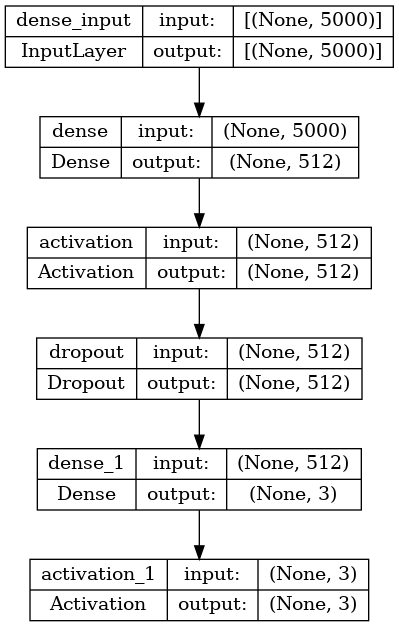

In [6]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [7]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy", Precision(), Recall()])


In [8]:
history = model.fit(
    X_train,
    Y_train,
    batch_size=64,
    epochs=EPOCH,
    verbose=1,
)

2023-06-25 03:55:22.011520: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 657940000 exceeds 10% of free system memory.
2023-06-25 03:55:22.584717: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 657940000 exceeds 10% of free system memory.


Epoch 1/10


2023-06-25 03:55:24.471872: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-06-25 03:55:24.483059: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7fd2e40416a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-06-25 03:55:24.483092: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2023-06-25 03:55:24.490395: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-06-25 03:55:24.752412: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8700
2023-06-25 03:55:24.863351: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifeti

515/515 [==============================] - 6s 6ms/step - loss: 0.4851 - accuracy: 0.8086 - precision: 0.8696 - recall: 0.7490
Epoch 2/10
515/515 [==============================] - 3s 6ms/step - loss: 0.2225 - accuracy: 0.9292 - precision: 0.9385 - recall: 0.9199
Epoch 3/10
515/515 [==============================] - 3s 7ms/step - loss: 0.1378 - accuracy: 0.9597 - precision: 0.9645 - recall: 0.9550
Epoch 4/10
515/515 [==============================] - 3s 7ms/step - loss: 0.0882 - accuracy: 0.9760 - precision: 0.9786 - recall: 0.9734
Epoch 5/10
515/515 [==============================] - 3s 6ms/step - loss: 0.0573 - accuracy: 0.9858 - precision: 0.9873 - recall: 0.9839
Epoch 6/10
515/515 [==============================] - 3s 7ms/step - loss: 0.0383 - accuracy: 0.9908 - precision: 0.9918 - recall: 0.9898
Epoch 7/10
515/515 [==============================] - 3s 7ms/step - loss: 0.0276 - accuracy: 0.9932 - precision: 0.9938 - recall: 0.9927
Epoch 8/10
515/515 [==============================] 

In [9]:
loss, accuracy, precision, recall = model.evaluate(X_test, Y_test, verbose=0)


def f1_score(precision, recall):
    """Function to calculate f1 score"""

    f1_val = 2 * (precision * recall) / (precision + recall + K.epsilon())
    return f1_val

print("Accuracy  : {:.4f}".format(accuracy))
print("Precision : {:.4f}".format(precision))
print("Recall    : {:.4f}".format(recall))
print("F1 Score  : {:.4f}".format(f1_score(precision, recall)))

Accuracy  : 0.9088
Precision : 0.9100
Recall    : 0.9074
F1 Score  : 0.9087


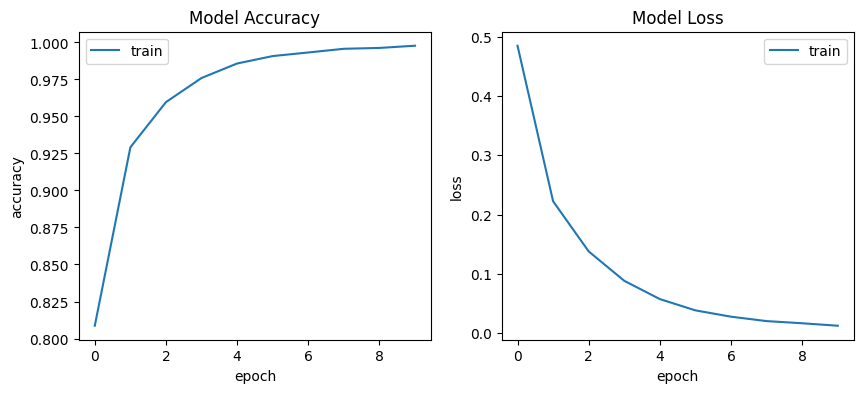

In [10]:
def plot_training_hist(history):
    """Function to plot history for accuracy and loss"""

    fig, ax = plt.subplots(1, 2, figsize=(10, 4))
    # first plot
    ax[0].plot(history.history["accuracy"])
    ax[0].set_title("Model Accuracy")
    ax[0].set_xlabel("epoch")
    ax[0].set_ylabel("accuracy")
    ax[0].legend(["train", "validation"], loc="best")

    # second plot
    ax[1].plot(history.history["loss"])
    ax[1].set_title("Model Loss")
    ax[1].set_xlabel("epoch")
    ax[1].set_ylabel("loss")
    ax[1].legend(["train", "validation"], loc="best")


plot_training_hist(history)

258/258 [==============================] - 0s 2ms/step
2    4389
1    2379
0    1457
Name: count, dtype: int64
2    4441
1    2412
0    1372
Name: count, dtype: int64


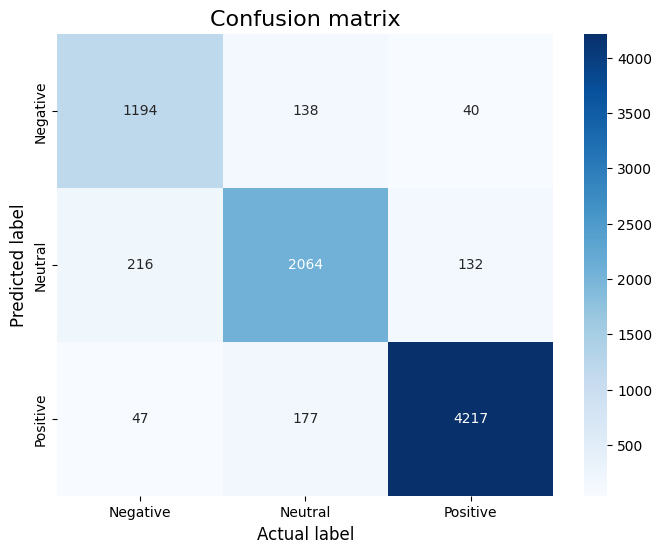

In [11]:
from sklearn.metrics import confusion_matrix


def plot_confusion_matrix(model, X_test, y_test):
    """Function to plot confusion matrix for the passed model and the data"""

    sentiment_classes = ["Negative", "Neutral", "Positive"]
    # use model to do the prediction
    y_pred = model.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(
        np.argmax(y_pred, axis=1), np.argmax(np.array(y_test), axis=1)
    )

    print(pd.Series(np.argmax(np.array(y_test), axis=1)).value_counts())
    print(pd.Series(np.argmax(y_pred, axis=1)).value_counts())

    # plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        cm,
        cmap=plt.cm.Blues,
        annot=True,
        fmt="d",
        xticklabels=sentiment_classes,
        yticklabels=sentiment_classes,
    )
    plt.title("Confusion matrix", fontsize=16)
    plt.xlabel("Actual label", fontsize=12)
    plt.ylabel("Predicted label", fontsize=12)


plot_confusion_matrix(model, X_test, Y_test)

In [13]:
with open("models/tweets_model.pickle", "wb") as model_file:
    pickle.dump(model, model_file)